Pnadas Mini project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [4]:
data = [
        ['name','score'],
        ['Alice',90],
        ['Bob',85],
        ['John',88],
        ['Mary',92],
        ['Leo',70],
        ['Jane',95] 
]


with open('students_with_results.csv', 'w', newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(data)

In [10]:
# read the csv file just created

with open('students_with_results.csv', 'r') as file:
    reader = csv.reader(file)
    table_data = list(reader)
    for row in reader:
        print(row)

In [12]:
df = pd.read_csv('students_with_results.csv')
print(df)

Empty DataFrame
Columns: [['name', 'score'], ['Alice', 90], ['Bob', 85], ['John', 88], ['Mary', 92], ['Leo', 70], ['Jane', 95]]
Index: []


In [2]:
# i created another file using this time around so as to get a tabular result

with open('C:/Users/user/Desktop/data-science-journey/Datasets/students_with_results.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['name', 'score']
['Alice', '90']
['Bob', '85']
['John', '88']
['Mary', '92']
['Leo', '70']
['Jane', '95']


In [3]:
df = pd.read_csv('C:/Users/user/Desktop/data-science-journey/Datasets/students_with_results.csv')
print(df)

    name  score
0  Alice     90
1    Bob     85
2   John     88
3   Mary     92
4    Leo     70
5   Jane     95


In [4]:
df['result'] = ['pass' if score >= 88 else 'fail' for score in df['score']]
print(df)

    name  score result
0  Alice     90   pass
1    Bob     85   fail
2   John     88   pass
3   Mary     92   pass
4    Leo     70   fail
5   Jane     95   pass


In [5]:
summary = df.describe()
print(summary)

           score
count   6.000000
mean   86.666667
std     8.846845
min    70.000000
25%    85.750000
50%    89.000000
75%    91.500000
max    95.000000


In [6]:
# working with groupby function on pandas

group_avg = df.groupby('result')['score'].mean()
print(group_avg)

result
fail    77.50
pass    91.25
Name: score, dtype: float64


In [7]:
# turning into table

group_avg_df = group_avg.reset_index()
print(group_avg_df)

  result  score
0   fail  77.50
1   pass  91.25


In [24]:
# to save into a new csv file

group_avg_df.to_csv('pass_fail_average.csv', index = False)

<Axes: title={'center': 'average_score: pass v fail'}, xlabel='result'>

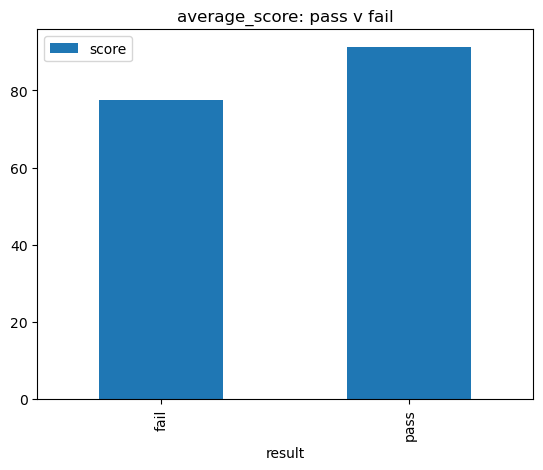

In [25]:
group_avg_df.plot(
x = 'result',
y = 'score',
kind = 'bar',
title = 'average_score: pass v fail'
)

In [12]:
# filter with AND function

df[(df['score'] >= 88) & (df['score'] > 90)]

,name,score,result
3,Mary,92,pass
5,Jane,95,pass


In [14]:
df[(df['result'] == 'pass') & (df['score'] >= 90)]

,name,score,result
0,Alice,90,pass
3,Mary,92,pass
5,Jane,95,pass


In [15]:
# filter with OR function

df[(df['score'] >= 88) | (df['score'] > 90)]

,name,score,result
0,Alice,90,pass
2,John,88,pass
3,Mary,92,pass
5,Jane,95,pass


In [16]:
df[(df['result'] == 'pass') | (df['score'] >= 90)]

,name,score,result
0,Alice,90,pass
2,John,88,pass
3,Mary,92,pass
5,Jane,95,pass


In [18]:
# filter and select column

df[df['score'] >= 88]['name']

0    Alice
2     John
3     Mary
5     Jane
Name: name, dtype: object

In [19]:
# sorting data in pandas

df.sort_values(by = 'score')

,name,score,result
4,Leo,70,fail
1,Bob,85,fail
2,John,88,pass
0,Alice,90,pass
3,Mary,92,pass
5,Jane,95,pass


In [20]:
df.sort_values(by = 'score', ascending = False)

,name,score,result
5,Jane,95,pass
3,Mary,92,pass
0,Alice,90,pass
2,John,88,pass
1,Bob,85,fail
4,Leo,70,fail


In [22]:
# sorting and keeping only the name and score

df.sort_values(by = 'score')[['name', 'score']]

,name,score
4,Leo,70
1,Bob,85
2,John,88
0,Alice,90
3,Mary,92
5,Jane,95


In [24]:
# to get the top 5 rows when sorting

df.sort_values(by = 'score', ascending = False)[['name', 'score']].head()

,name,score
5,Jane,95
3,Mary,92
0,Alice,90
2,John,88
1,Bob,85


In [25]:
df.sort_values(by = 'score', ascending = False)[['name', 'score']].tail()

,name,score
3,Mary,92
0,Alice,90
2,John,88
1,Bob,85
4,Leo,70


In [26]:
# reset index after sorting(very important)

df.sort_values(by = 'score', ascending = False).reset_index(drop = True)


,name,score,result
0,Jane,95,pass
1,Mary,92,pass
2,Alice,90,pass
3,John,88,pass
4,Bob,85,fail
5,Leo,70,fail


In [28]:
# values counts: to count how many times somthing appeared

df['score'].value_counts()

score
90    1
85    1
88    1
92    1
70    1
95    1
Name: count, dtype: int64

In [29]:
df['result'].value_counts()

result
pass    4
fail    2
Name: count, dtype: int64

In [35]:
result_count = df['result'].value_counts().reset_index()
result_count_column = ['result', 'count']
print(result_count)

  result  count
0   pass      4
1   fail      2


handling missing values

In [38]:
data = {
    'name': ['alice', 'bob', 'john', 'mary'],
    'score':[90, None, 88, None]
}

df_missing = pd.DataFrame(data)
print(df_missing)

    name  score
0  alice   90.0
1    bob    NaN
2   john   88.0
3   mary    NaN


In [40]:
# to check the null values
# True - missing values
# False - not missing values

df_missing.isnull()

,name,score
0,False,False
1,False,True
2,False,False
3,False,True


In [45]:
# to count the missing or null values

df_missing.isnull().sum()

name     0
score    2
dtype: int64

In [47]:
# remove rows with missing or null values

df_drop = df_missing.dropna()
print(df_drop)

    name  score
0  alice   90.0
2   john   88.0


In [49]:
# filling missing values

avg_score = df_missing['score'].mean()
df_filled = df_missing.fillna(avg_score)
print(df_filled)

    name  score
0  alice   90.0
1    bob   89.0
2   john   88.0
3   mary   89.0
